# Demand Forectast Exploration
***

### Importing Utility Packages
***

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Load Data
***

In [26]:
data1 = [3256, 3315, 3006, 3560, 3300, 3051, 3425, 3703, 3240, 3231, 2887, 3918, 3271, 3073,
         3396, 3036, 3196, 4106, 3449, 3913, 3324, 3277, 3204, 4079] 
data2 = [105, 95, 106, 121, 114, 130, 118, 119]
data3 = [3973, 3531, 3523, 3551, 3524, 3632, 3525, 3620]

### Mean Absolute Deviation
***

In [27]:
def MAD(real_demand, forecast_demand):
    """
    Calcutate Mean Absolute Deviation of a 1D array.

    Inputs:
        real_demand (np.array): real demand array.
        forecast_demand (np.array): predicted demand from actual data.

    Returns:
        MAD (float): MAD result for the signals under analysis.
    """

    if len(real_demand) == len(forecast_demand):
        return np.sum(np.abs(real_demand - forecast_demand)) / len(real_demand)
    else:
        print("The signs must have the same size.")
        return None

### Accumulated Error
***

In [28]:
def accumulated_error(real_demand, forecast_demand):
    """
    Calculates the accumulated error of a 1D array.

    Inputs:
        real_demand (np.array): real demand array.
        forecast_demand (np.array): predicted demand from actual data.
    
    Returns:
        error (float): cumulative error result.
    """

    if len(real_demand) == len(forecast_demand):
        return np.sum(real_demand - forecast_demand)
    else:
        print("The signs must have the same size.")
        return None

### Moving Average
***

In [29]:
def moving_average(real_demand, window_size):
    """
    Calculates the moving average of a 1D array.

    Inputs:
        real_demand (np.array): real demand array.
        window_size (int): sliding window size.
    
    Returns:
        mov_avg (np.array): array containing the moving averages.
    """

    return np.convolve(real_demand, np.ones(window_size) / window_size, mode="valid")[:-1]

In [30]:
data_mov_avg = moving_average(data1, 12)
print(f"Accumulated Error: {accumulated_error(data1[12:], data_mov_avg)}")
print(f"MAD: {MAD(data1[12:], data_mov_avg)}")

Accumulated Error: 1074.8333333333353
MAD: 272.55555555555554


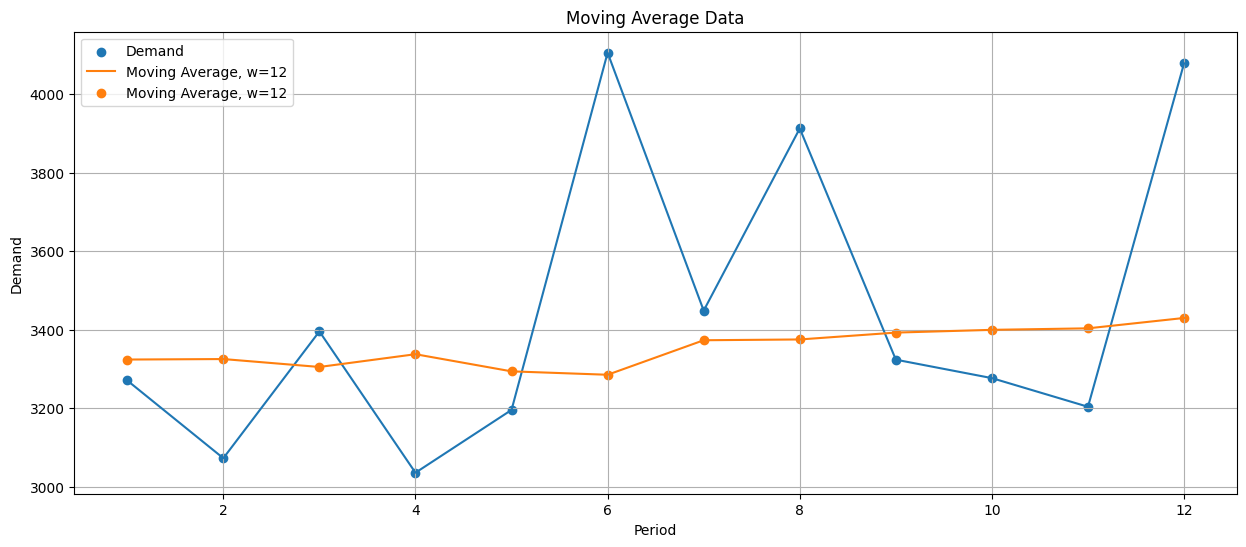

In [31]:
plt.figure(figsize=(15,6))

plt.plot(np.linspace(1, len(data1[12:]), 12), data1[12:])
plt.scatter(np.linspace(1, len(data1[12:]), 12), data1[12:], label="Demand")

plt.plot(np.linspace(1, len(data1[12:]), 12), data_mov_avg, label="Moving Average, w=12")
plt.scatter(np.linspace(1, len(data1[12:]), 12), data_mov_avg, label="Moving Average, w=12")

plt.title("Moving Average Data")
plt.xlabel("Period")
plt.ylabel("Demand")
plt.legend()
plt.grid(True)

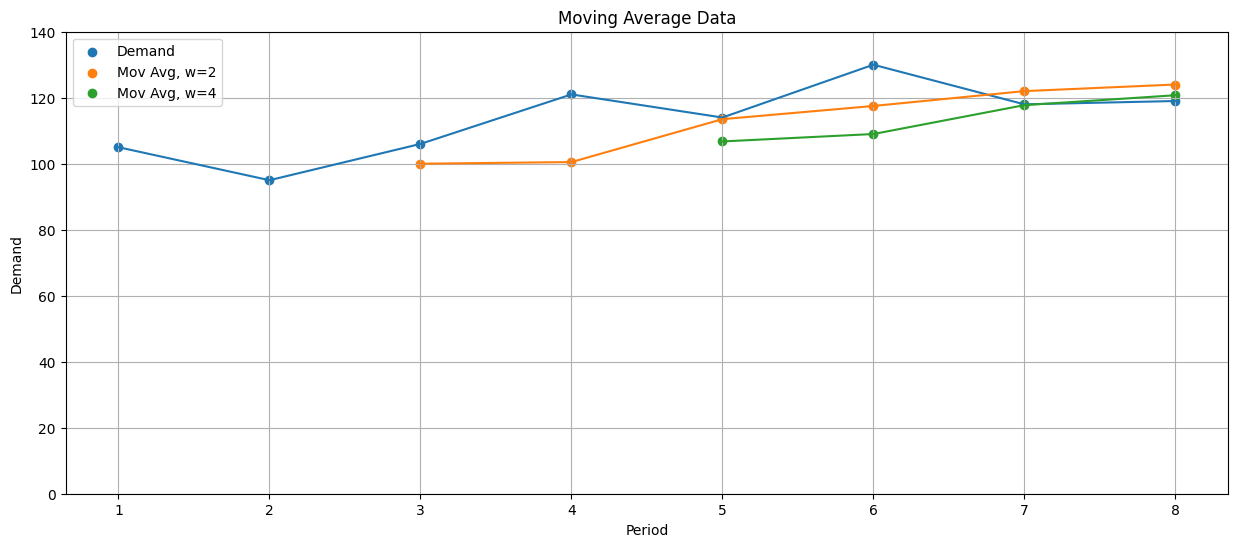

In [32]:
data_mov_avg_w2 = moving_average(data2, 2)
data_mov_avg_w4 = moving_average(data2, 4)

plt.figure(figsize=(15,6))

plt.plot(np.linspace(1, len(data2), len(data2)), data2)
plt.scatter(np.linspace(1, len(data2), len(data2)), data2, label="Demand")

plt.plot(np.linspace(3, len(data2), len(data_mov_avg_w2)), data_mov_avg_w2)
plt.scatter(np.linspace(3, len(data2), len(data_mov_avg_w2)), data_mov_avg_w2, label="Mov Avg, w=2")

plt.plot(np.linspace(5, len(data2), len(data_mov_avg_w4)), data_mov_avg_w4)
plt.scatter(np.linspace(5, len(data2), len(data_mov_avg_w4)), data_mov_avg_w4, label="Mov Avg, w=4")

plt.ylim([0, 140])
plt.title("Moving Average Data")
plt.xlabel("Period")
plt.ylabel("Demand")
plt.legend()
plt.grid(True)

In [33]:
print(f"MAD, w=2: {MAD(data2[4:], data_mov_avg_w2[2:])}")
print(f"Accumulated Error, w=2: {accumulated_error(data2[4:], data_mov_avg_w2[2:])}")
print(f"MAD, w=4: {MAD(data2[4:], data_mov_avg_w4)}")
print(f"Accumulated Error, w=4: {accumulated_error(data2[4:], data_mov_avg_w4)}")

MAD, w=2: 5.5
Accumulated Error, w=2: 4.0
MAD, w=4: 7.5625
Accumulated Error, w=4: 26.75


### Simple Exponential Average
***

In [34]:
def simple_exponencial_average(real_demand, alpha):
    """
    Calculates the exponential moving average using a 1D array.

    Inputs:
        real_demand (np.array): real demand array.
        alpha (float): damping coefficient of the mean.
    
    Returns:
        sea (np.array): exponential moving average result.
    """
    
    sea = []

    for index in range(0, len(real_demand)):
        if index == 0: 
            pass
        elif index == 1:
            sea.append(real_demand[index-1])
        else:
            sea.append(sea[-1] + alpha*(real_demand[index-1] - sea[-1]))
    
    return np.array(sea)

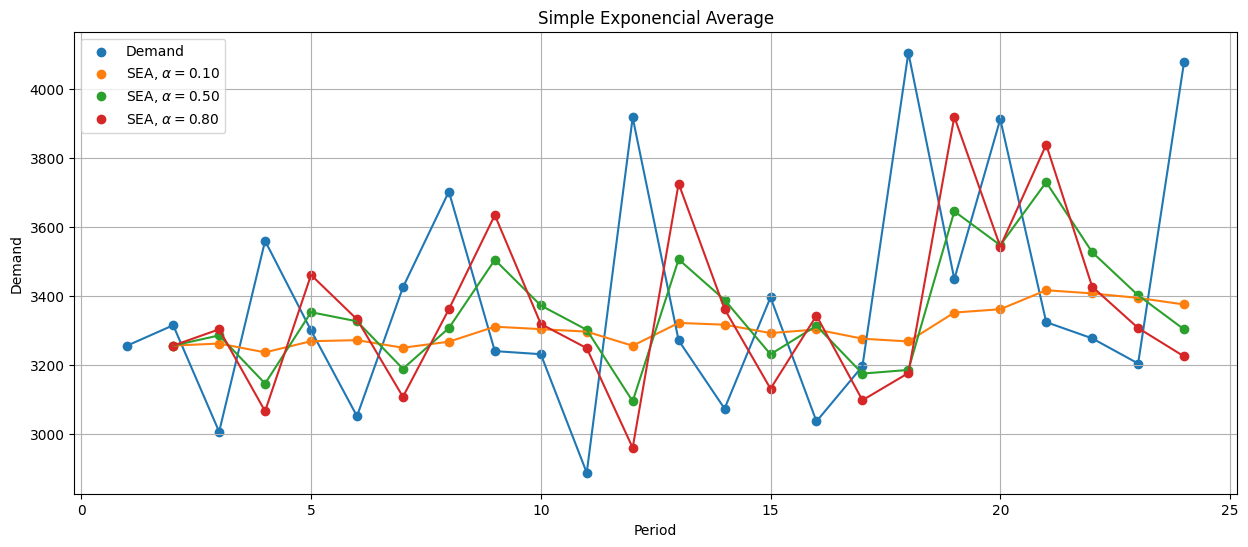

In [35]:
sea_alpha_0_10 = simple_exponencial_average(data1, 0.10)
sea_alpha_0_50 = simple_exponencial_average(data1, 0.50)
sea_alpha_0_80 = simple_exponencial_average(data1, 0.80)

plt.figure(figsize=(15,6))

plt.plot(np.linspace(1, len(data1), len(data1)), data1)
plt.scatter(np.linspace(1, len(data1), len(data1)), data1, label="Demand")

plt.plot(np.linspace(2, len(data1), len(data1)-1), sea_alpha_0_10)
plt.scatter(np.linspace(2, len(data1), len(data1)-1), sea_alpha_0_10, label="SEA, $\\alpha=0.10$")

plt.plot(np.linspace(2, len(data1), len(data1)-1), sea_alpha_0_50)
plt.scatter(np.linspace(2, len(data1), len(data1)-1), sea_alpha_0_50, label="SEA, $\\alpha=0.50$")

plt.plot(np.linspace(2, len(data1), len(data1)-1), sea_alpha_0_80)
plt.scatter(np.linspace(2, len(data1), len(data1)-1), sea_alpha_0_80, label="SEA, $\\alpha=0.80$")


plt.title("Simple Exponencial Average")
plt.xlabel("Period")
plt.ylabel("Demand")
plt.legend()
plt.grid(True)

In [36]:
print(f"Accumulated Error, alpha = 0.10: {accumulated_error(data1[1:], sea_alpha_0_10)}")
print(f"Accumulated Error, alpha = 0.50: {accumulated_error(data1[1:], sea_alpha_0_50)}")
print(f"Accumulated Error, alpha = 0.80: {accumulated_error(data1[1:], sea_alpha_0_80)}")

print(f"MAD, alpha = 0.10: {MAD(data1[1:], sea_alpha_0_10)}")
print(f"MAD, alpha = 0.50: {MAD(data1[1:], sea_alpha_0_50)}")
print(f"MAD, alpha = 0.80: {MAD(data1[1:], sea_alpha_0_80)}")

Accumulated Error, alpha = 0.10: 1897.0299313923979
Accumulated Error, alpha = 0.50: 870.0210855007172
Accumulated Error, alpha = 0.80: 815.150084455749
MAD, alpha = 0.10: 263.7339411844561
MAD, alpha = 0.50: 325.486302199571
MAD, alpha = 0.80: 372.32019935474676


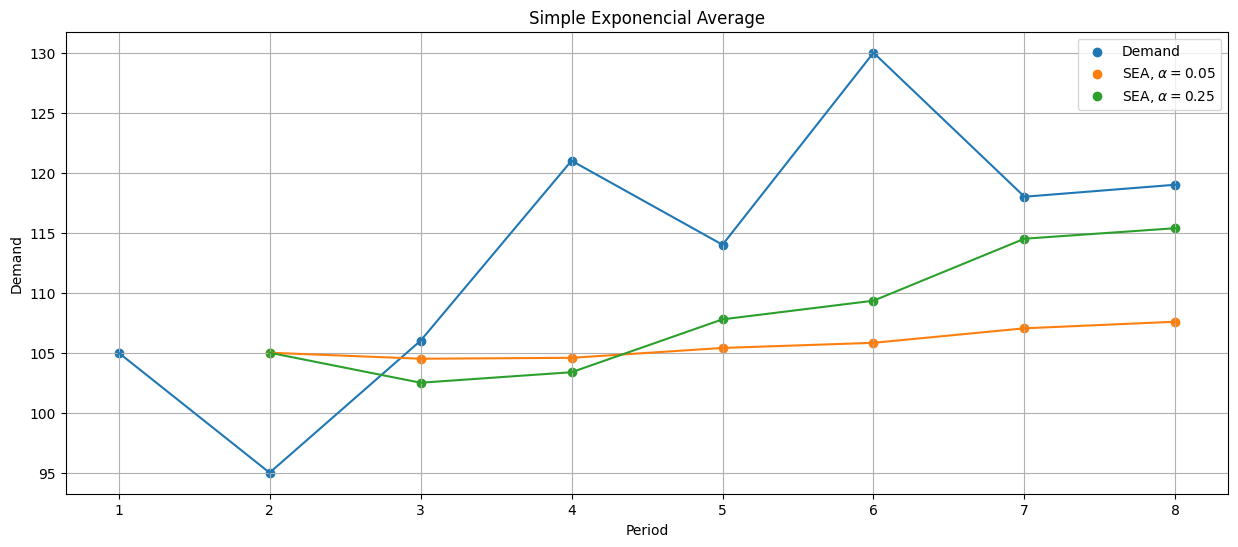

In [37]:
sea_alpha_0_05 = simple_exponencial_average(data2, 0.05)
sea_alpha_0_25 = simple_exponencial_average(data2, 0.25)

plt.figure(figsize=(15,6))

plt.plot(np.linspace(1, len(data2), len(data2)), data2)
plt.scatter(np.linspace(1, len(data2), len(data2)), data2, label="Demand")

plt.plot(np.linspace(2, len(data2), len(data2)-1), sea_alpha_0_05)
plt.scatter(np.linspace(2, len(data2), len(data2)-1), sea_alpha_0_05, label="SEA, $\\alpha=0.05$")

plt.plot(np.linspace(2, len(data2), len(data2)-1), sea_alpha_0_25)
plt.scatter(np.linspace(2, len(data2), len(data2)-1), sea_alpha_0_25, label="SEA, $\\alpha=0.25$")

plt.title("Simple Exponencial Average")
plt.xlabel("Period")
plt.ylabel("Demand")
plt.legend()
plt.grid(True)

In [38]:
print(f"Accumulated Error, alpha = 0.05: {accumulated_error(data2[1:], sea_alpha_0_05)}")
print(f"Accumulated Error, alpha = 0.25: {accumulated_error(data2[1:], sea_alpha_0_25)}")

print(f"MAD, alpha = 0.05: {MAD(data2[1:], sea_alpha_0_05)}")
print(f"MAD, alpha = 0.25: {MAD(data2[1:], sea_alpha_0_25)}")

Accumulated Error, alpha = 0.05: 63.08383703124994
Accumulated Error, alpha = 0.25: 45.12939453125
MAD, alpha = 0.05: 11.86911957589285
MAD, alpha = 0.25: 9.30419921875


### Exponential Smoothing with Trend
****

In [39]:
def exponential_smoot_with_trend(real_demand, alpha1, alpha2):
    """
    Computes the trended exponential smoothing of a 1D array.

    Inputs:
        real_demand (np.array): real demand array.
        alpha1 (float): Level smoothing coefficient.
        alpha2 (float): Trend smoothing coefficient.
    
    Returns:
        pt (np.array): Forecasts for each time period.
        mt (np.array): Smoothed level values over time.
        tt (np.array): Smoothed trend values over time.
    """
    
    pt, mt, tt = [], [], []
    for i in range(0, len(real_demand)):
        if i == 1:
            pt.append(real_demand[i+1])
        elif i == 2:
            mt.append(pt[-1])
            tt.append((real_demand[i] - real_demand[0]) / 2)
            pt.append(mt[-1] + tt[-1])
        elif i > 2:
            mt.append(pt[-1] + alpha1 * (real_demand[i] - pt[-1]))
            tt.append(tt[-1] + alpha2 * ((pt[-1] - pt[-2]) - tt[-1]))
            pt.append(mt[-1] + tt[-1])
    
    return np.array(pt), np.array(mt), np.array(tt)

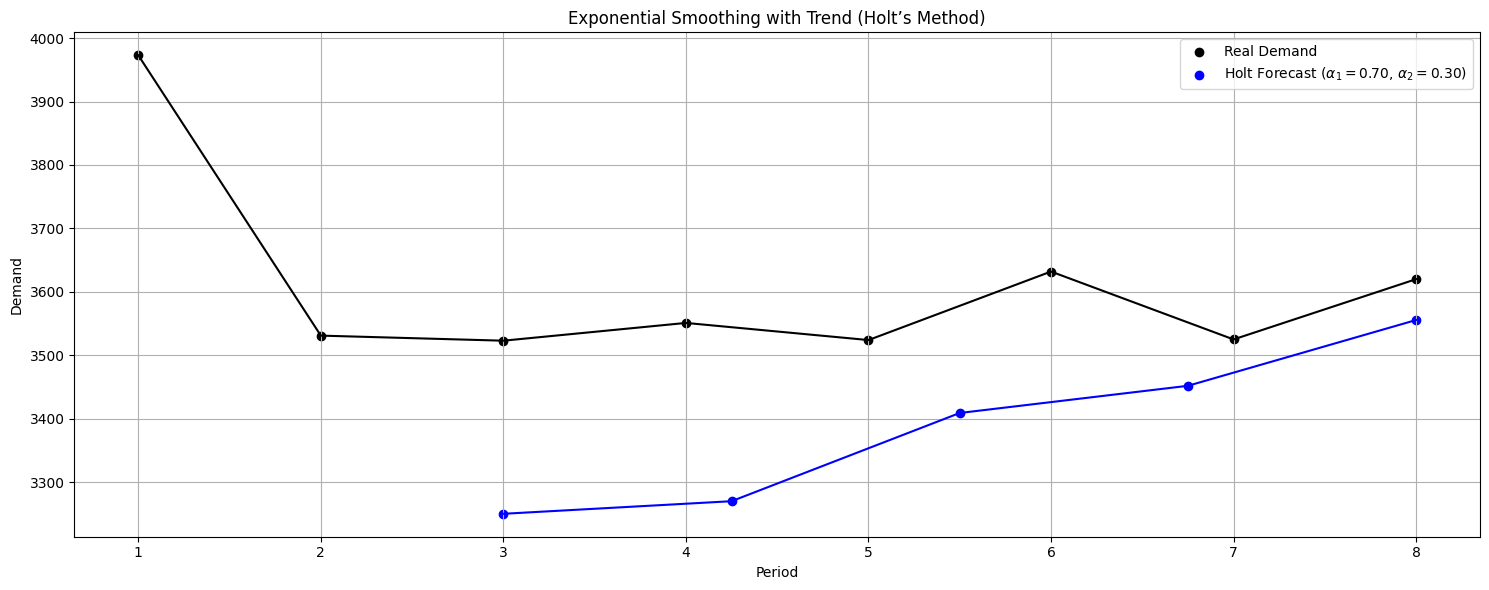

In [40]:
pt, mt, tt = exponential_smoot_with_trend(data3, 0.70, 0.30)

plt.figure(figsize=(15, 6))

x_real = np.linspace(1, len(data3), len(data3))
x_forecast = np.linspace(3, len(data3), len(pt) - 2)  

plt.plot(x_real, data3, color="black")
plt.scatter(x_real, data3, label="Real Demand", color="black")

plt.plot(x_forecast, pt[2:], color="blue")
plt.scatter(x_forecast, pt[2:], label="Holt Forecast ($\\alpha_1=0.70$, $\\alpha_2=0.30$)", color="blue")

plt.title("Exponential Smoothing with Trend (Holt’s Method)")
plt.xlabel("Period")
plt.ylabel("Demand")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [41]:
def linear_projection(X, Y):
    """
    Calculates the linear projection (line Y = a + bX) from the X and Y data.

    Inputs:
        X (np.array): Vector with the X-axis values (e.g., periods).
        Y (np.array): Vector with the actual Y values (e.g., observed demand).

    Returns:
        np.array: Predicted Y values based on the fitted line.
    """
    
    n = len(X)
    sum_x = np.sum(X)
    sum_y = np.sum(Y)
    sum_x2 = np.sum(X**2)
    sum_xy = np.sum(X * Y)

    b = (n * sum_xy - sum_x * sum_y) / (n * sum_x2 - sum_x**2)

    a = (sum_y - b * sum_x) / n

    print(f"{a} + {b} * X")

    return a + b * X

3197.3695652173915 + 14.930434782608696 * X
3197.3695652173915 + 14.930434782608696 * X


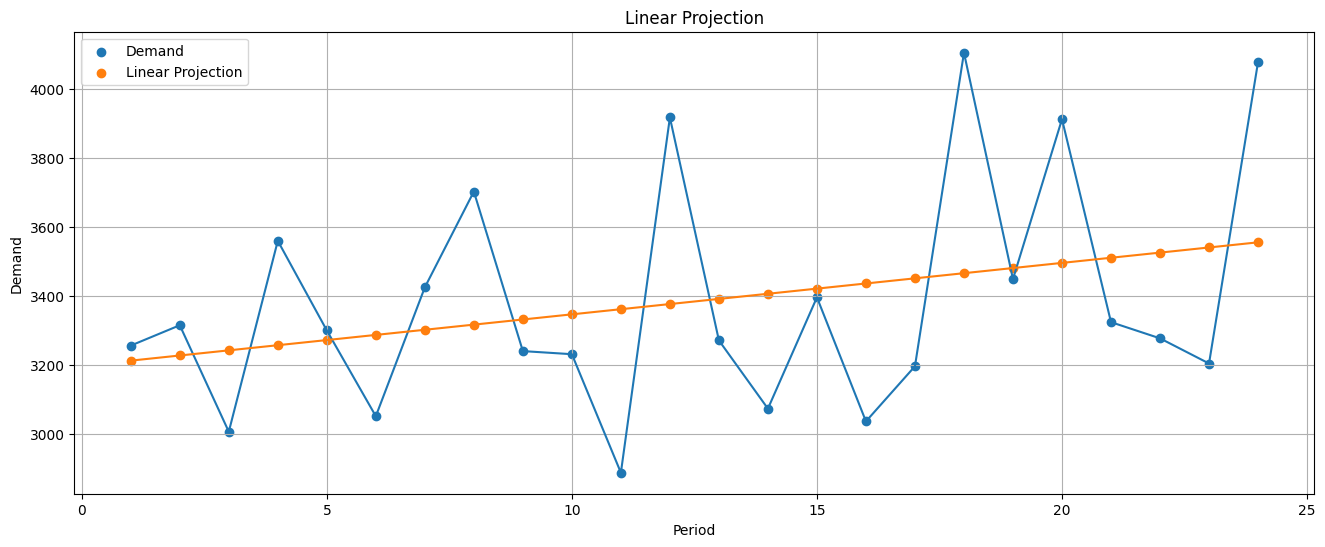

In [42]:
X = np.linspace(1, len(data1), len(data1))
Y = data1

plt.figure(figsize=(16,6))

plt.plot(X, data1)
plt.scatter(X, data1, label="Demand")

plt.plot(X, linear_projection(X, Y))
plt.scatter(X, linear_projection(X, Y), label="Linear Projection")

plt.title("Linear Projection")
plt.xlabel("Period")
plt.ylabel("Demand")
plt.legend()
plt.grid(True)

In [43]:
def seasonal_decompose_simple(series, period):
    """
    Estimates simple seasonality from a time series (no trend considered).

    Parameters:
        series (pd.Series): Time series data (e.g., monthly sales).
        period (int): Number of periods in one seasonal cycle (e.g., 12 for monthly seasonality).

    Returns:
        np.array: Seasonal indices repeating over the full series length.
    """
    # Reshape series to matrix with full seasons per row
    values = series.to_numpy()
    n_complete = len(values) // period
    reshaped = values[:n_complete * period].reshape(n_complete, period)
    
    # Compute average per period position
    seasonal_indices = reshaped.mean(axis=0)
    
    # Normalize seasonal indices to center around 0 (optional)
    seasonal_indices -= seasonal_indices.mean()

    # Repeat to match original length
    seasonal_full = np.tile(seasonal_indices, len(series) // period + 1)[:len(series)]
    
    return seasonal_full


In [44]:
def seasonal_decompose_with_trend(series, period):
    """
    Performs classical additive decomposition (trend + seasonality + residual).

    Parameters:
        series (pd.Series): Time series data indexed by time.
        period (int): Number of observations per seasonal cycle.

    Returns:
        dict: Dictionary containing 'trend', 'seasonal', and 'resid' components.
    """
    result = seasonal_decompose(series, model='additive', period=period)
    return {
        'trend': result.trend,
        'seasonal': result.seasonal,
        'resid': result.resid
    }


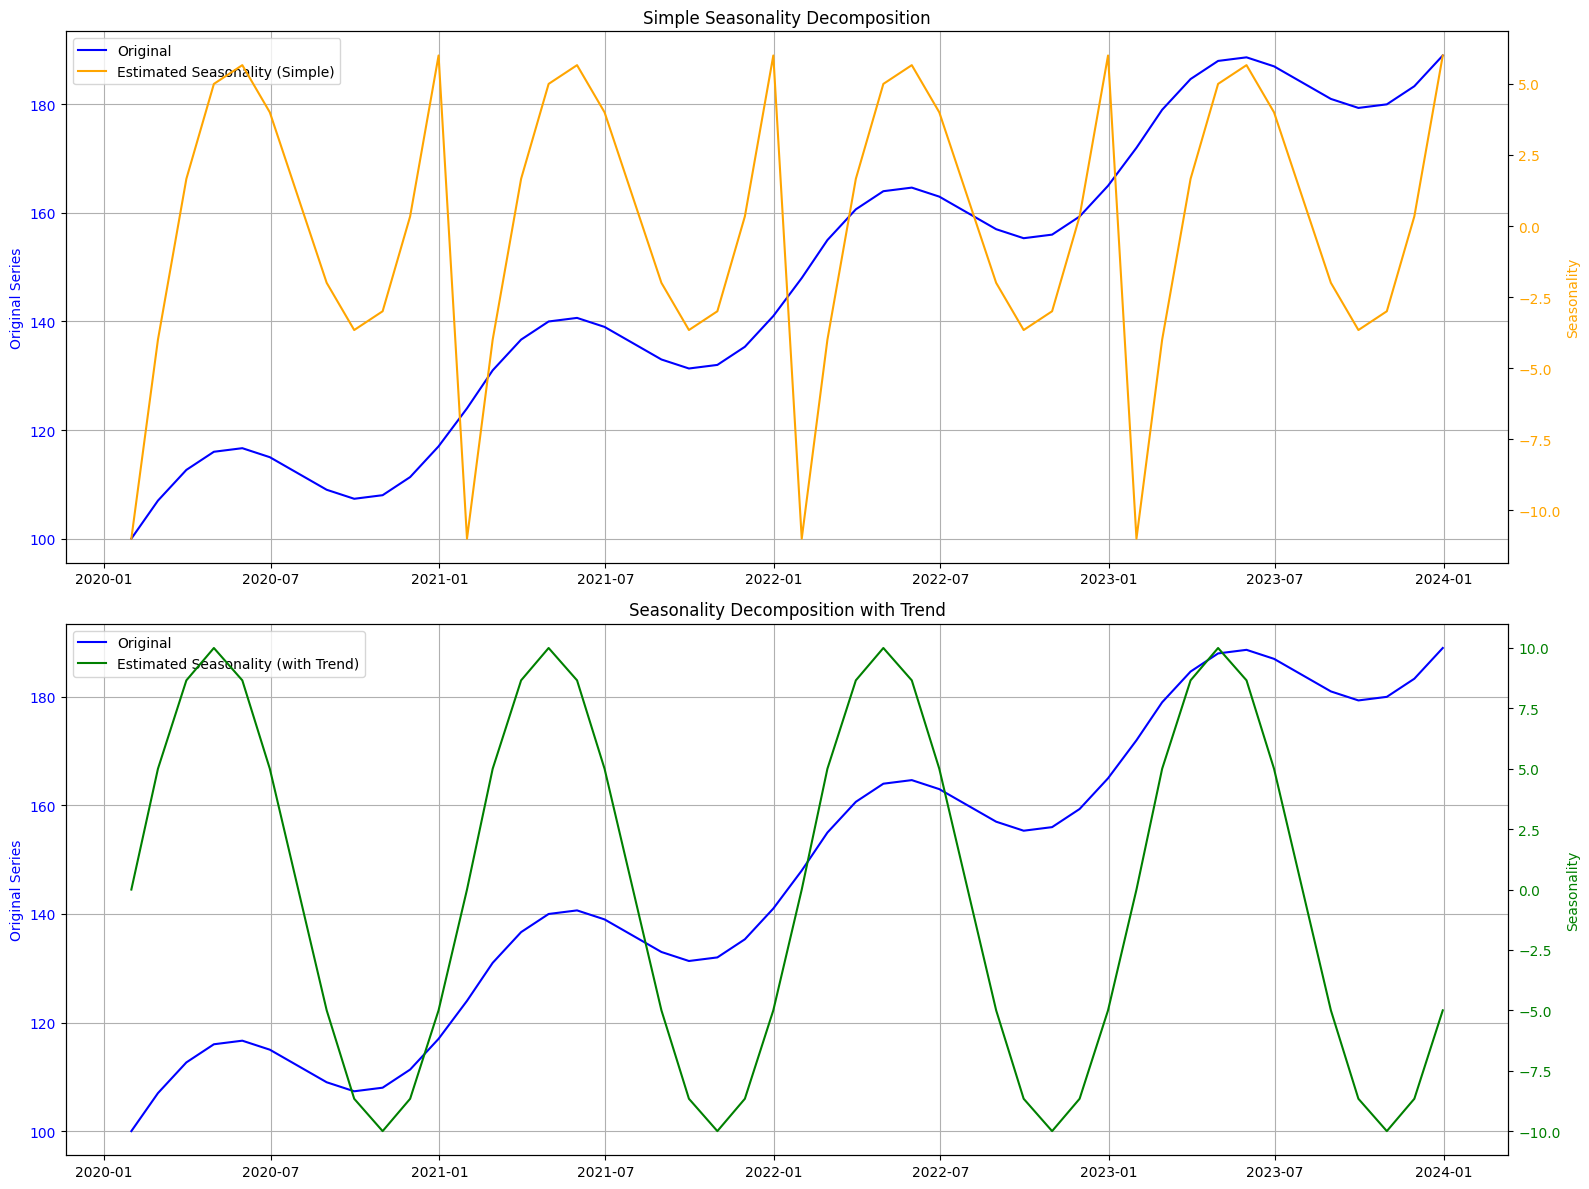

In [45]:
rng = pd.date_range("2020-01", periods=48, freq="ME")
ts = pd.Series(100 + np.sin(np.arange(48) * 2 * np.pi / 12) * 10 + np.arange(48) * 2, index=rng)

seasonal_simple = seasonal_decompose_simple(ts, 12)
components = seasonal_decompose_with_trend(ts, 12)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12))

ax1.plot(ts.index, ts, label="Original", color='blue')
ax1.set_ylabel('Original Series', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True)

ax1b = ax1.twinx()
ax1b.plot(pd.Series(seasonal_simple, index=ts.index), 
         label="Estimated Seasonality (Simple)", color='orange')
ax1b.set_ylabel('Seasonality', color='orange')
ax1b.tick_params(axis='y', labelcolor='orange')

ax1.set_title("Simple Seasonality Decomposition")

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax1b.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

ax2.plot(ts.index, ts, label="Original", color='blue')
ax2.set_ylabel('Original Series', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')
ax2.grid(True)

ax2b = ax2.twinx()
ax2b.plot(pd.Series(components['seasonal'], index=ts.index), 
          label="Estimated Seasonality (with Trend)", color='green')
ax2b.set_ylabel('Seasonality', color='green')
ax2b.tick_params(axis='y', labelcolor='green')

ax2.set_title("Seasonality Decomposition with Trend")
lines1, labels1 = ax2.get_legend_handles_labels()
lines2, labels2 = ax2b.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.tight_layout()
plt.show()

### Question

The demand for cement is correlated with the level of construction activity in a given region. Data from the last seven years shows the following performance:

|Year|1|2|3|4|5|6|7|
|-|-|-|-|-|-|-|-|
|Cement Demand ($m^3$)|735|600|770|670|690|780|640
|Construction Rate ($m^2$)|100|80|105|92|95|107|87|

If the construction activity level forecast for next year is 90 $m^2$, what is the expected demand for cement?

In [46]:
construction = np.array([100, 80, 105, 92, 95, 107, 87])
cement = np.array([735, 600, 770, 670, 690, 780, 640])

r = np.corrcoef(construction, cement)[0, 1]
print(f"Correlation coefficient r = {r:.4f}")

Correlation coefficient r = 0.9970


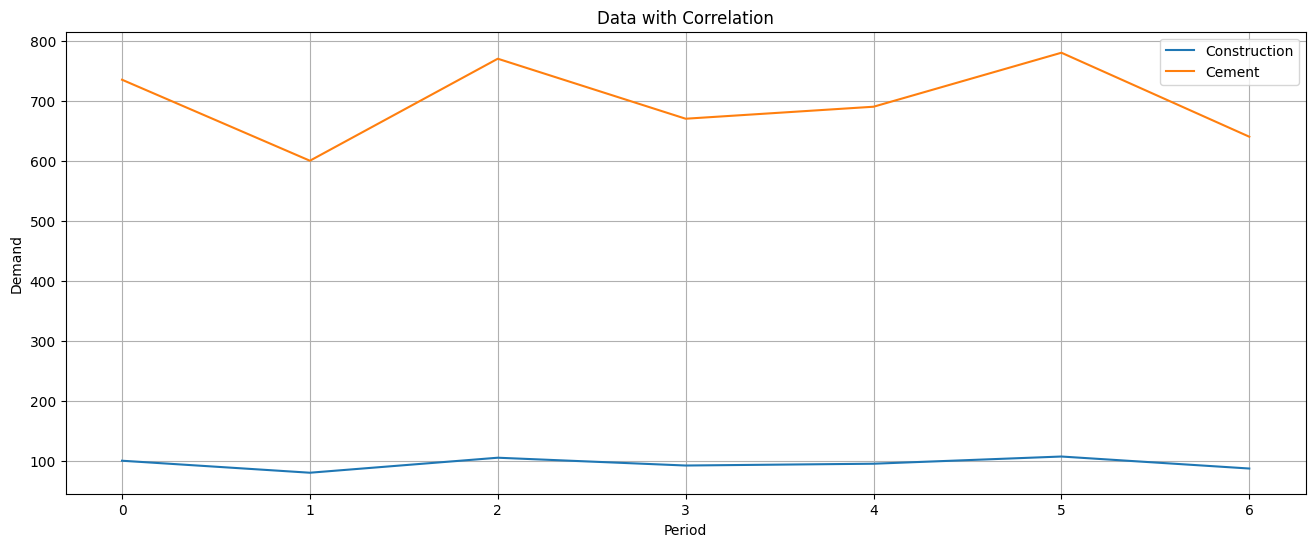

In [47]:
plt.figure(figsize=(16,6))

plt.plot(construction, label="Construction")
plt.plot(cement, label="Cement")

plt.title("Data with Correlation")
plt.xlabel("Period")
plt.ylabel("Demand")
plt.legend()
plt.grid(True)

In [48]:
linear_projection(X=construction, Y=cement)

42.07157258064516 + 6.892641129032258 * X


array([731.33568548, 593.4828629 , 765.79889113, 676.19455645,
       696.87247984, 779.58417339, 641.73135081])

In [53]:
cement_prevision = 42.07 + 6.89 * 90

print(f"Cement Prevision: {round(cement_prevision, 2)} m3")

Cement Prevision: 662.17 m3
